# **Домашнее задание: Решающие деревья и ансамбли**
## Автор: Харинова Софья
## Группа: М-26

## **Задание 1. Подготовка данных и базовые модели**

In [1]:
# Импорт необходимых библиотек
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris, load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.inspection import DecisionBoundaryDisplay

### **1.1. Загрузка и первичный анализ данных**


In [2]:
# Загрузка данных Iris
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

print("Iris dataset:")
print(f"Количество объектов: {X_iris.shape[0]}")
print(f"Количество признаков: {X_iris.shape[1]}")
print(f"Классы: {np.unique(y_iris)}")
print(f"Названия классов: {iris.target_names}")
print(f"Названия признаков: {iris.feature_names}")

Iris dataset:
Количество объектов: 150
Количество признаков: 4
Классы: [0 1 2]
Названия классов: ['setosa' 'versicolor' 'virginica']
Названия признаков: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


**Данные для Iris:**

* Количество объектов: 150
* Количество признаков: 4
* Классы: [0 1 2]
* Названия классов: ['setosa' 'versicolor' 'virginica']
* Названия признаков: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

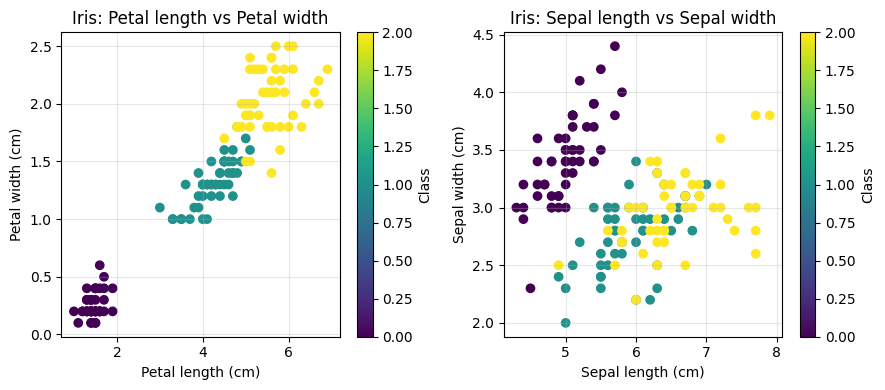

In [3]:
# Визуализация Iris
plt.figure(figsize=(9, 4))

plt.subplot(1, 2, 1)
scatter = plt.scatter(X_iris[:, 2], X_iris[:, 3], c=y_iris, cmap='viridis')
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.title('Iris: Petal length vs Petal width')
plt.colorbar(scatter, label='Class')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
scatter = plt.scatter(X_iris[:, 0], X_iris[:, 1], c=y_iris, cmap='viridis')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('Iris: Sepal length vs Sepal width')
plt.colorbar(scatter, label='Class')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



## Анализ линейной разделимости
Задача не является полностью линейно разделимой по всем признакам одновременно. Хотя некоторые пары признаков ( petal length и petal width) обеспечивают хорошую разделимость.

**По графику "Petal length vs Petal width":**
Классы достаточно хорошо разделены, особенно класс 0 (setosa)  отделен от классов 1 и 2. Между классами 1 (versicolor) и 2 (virginica) есть некоторое перекрытие, но в целом граница прослеживается
Для разделения классов по этим двум признакам задача выглядит практически линейно разделимой

**По графику "Sepal length vs Sepal width":**
Классы значительно сильнее перекрываются. Класс 0 (setosa) частично отделим, но классы 1 и 2 сильно перемешаны.По этим признакам задача не является линейно разделимой





In [4]:
# Загрузка данных Diabetes
diabetes = load_diabetes()
X_diabetes = diabetes.data
y_diabetes = diabetes.target

print("\nDiabetes dataset:")
print(f"Количество объектов: {X_diabetes.shape[0]}")
print(f"Количество признаков: {X_diabetes.shape[1]}")
print(f"Диапазон целевой переменной: [{y_diabetes.min():.2f}, {y_diabetes.max():.2f}]")
print(f"Среднее значение целевой переменной: {y_diabetes.mean():.2f}")
print(f"Названия признаков: {diabetes.feature_names}")


Diabetes dataset:
Количество объектов: 442
Количество признаков: 10
Диапазон целевой переменной: [25.00, 346.00]
Среднее значение целевой переменной: 152.13
Названия признаков: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


**Данные dataset:**
* Количество объектов: 442
* Количество признаков: 10
* Диапазон целевой переменной: [25.00, 346.00]
* Среднее значение целевой переменной: 152.13
* Названия признаков: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

Целевая переменная - количественная мера прогрессирования диабета.

Признаки нормализованы.
Целевая переменная имеет широкий диапазон значений от 25 до 346
Среднее значение 152.13 указывает на смещение распределения. Значения не нормализованы, имеют большой разброс. целевая переменная требует внимания - тк широкий диапазон может влиять на метрики MSE



In [5]:
# Разделение данных на обучающую и тестовую выборки
X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(
    X_iris, y_iris, test_size=0.3, random_state=42
)

X_diabetes_train, X_diabetes_test, y_diabetes_train, y_diabetes_test = train_test_split(
    X_diabetes, y_diabetes, test_size=0.3, random_state=42
)

print("Размеры выборок:")
print(f"Iris - обучающая: {X_iris_train.shape}, тестовая: {X_iris_test.shape}")
print(f"Diabetes - обучающая: {X_diabetes_train.shape}, тестовая: {X_diabetes_test.shape}")

Размеры выборок:
Iris - обучающая: (105, 4), тестовая: (45, 4)
Diabetes - обучающая: (309, 10), тестовая: (133, 10)


### **1.2. Базовые линейные модели (baseline)**


In [6]:
# Логистическая регрессия для Iris
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_iris_train, y_iris_train)

y_iris_train_pred = logreg.predict(X_iris_train)
y_iris_test_pred = logreg.predict(X_iris_test)

train_accuracy = accuracy_score(y_iris_train, y_iris_train_pred)
test_accuracy = accuracy_score(y_iris_test, y_iris_test_pred)

print("Логистическая регрессия (Iris):")
print(f"Точность на обучающей выборке: {train_accuracy:.4f}")
print(f"Точность на тестовой выборке: {test_accuracy:.4f}")

Логистическая регрессия (Iris):
Точность на обучающей выборке: 0.9619
Точность на тестовой выборке: 1.0000


Небольшая разница в точности (96.2% и 100%) в цедом в пределах статистической погрешности. Модель адекватно описывает данные, нет признаков недообучения.

In [7]:
# Линейная регрессия для Diabetes
linreg = LinearRegression()
linreg.fit(X_diabetes_train, y_diabetes_train)

y_diabetes_train_pred = linreg.predict(X_diabetes_train)
y_diabetes_test_pred = linreg.predict(X_diabetes_test)

train_mse = mean_squared_error(y_diabetes_train, y_diabetes_train_pred)
test_mse = mean_squared_error(y_diabetes_test, y_diabetes_test_pred)
train_r2 = r2_score(y_diabetes_train, y_diabetes_train_pred)
test_r2 = r2_score(y_diabetes_test, y_diabetes_test_pred)

print("Линейная регрессия (Diabetes):")
print(f"MSE на обучающей выборке: {train_mse:.2f}")
print(f"MSE на тестовой выборке: {test_mse:.2f}")
print(f"R^2 на обучающей выборке: {train_r2:.4f}")
print(f"R^2 на тестовой выборке: {test_r2:.4f}")

Линейная регрессия (Diabetes):
MSE на обучающей выборке: 2924.05
MSE на тестовой выборке: 2821.75
R^2 на обучающей выборке: 0.5244
R^2 на тестовой выборке: 0.4773


MSE на обучающей и тестовой выборках близки, что указывает на отсутствие сильного переобучения.
значения R^2 довольно низкие: 0.52 на обучении и 0.48 на тесте, вероятнее существуют нелинейные зависимости или важные признаки, не учтенные в линейной модели.

Гипотеза: Линейной модели нЕ достаточно для адекватного описания данных

Модель объясняет только около 50% дисперсии целевой переменной



## **Задание 2. Решающее дерево для классификации (Iris)**


### **2.1. Базовое дерево**

In [8]:
# Дерево с критерием Gini
tree_gini = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=42)
tree_gini.fit(X_iris_train, y_iris_train)

y_train_pred_gini = tree_gini.predict(X_iris_train)
y_test_pred_gini = tree_gini.predict(X_iris_test)

train_accuracy_gini = accuracy_score(y_iris_train, y_train_pred_gini)
test_accuracy_gini = accuracy_score(y_iris_test, y_test_pred_gini)

print("Дерево с критерием Gini:")
print(f"Точность на обучающей выборке: {train_accuracy_gini:.4f}")
print(f"Точность на тестовой выборке: {test_accuracy_gini:.4f}")


# Дерево с критерием энтропии
tree_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state=42)
tree_entropy.fit(X_iris_train, y_iris_train)

y_train_pred_entropy = tree_entropy.predict(X_iris_train)
y_test_pred_entropy = tree_entropy.predict(X_iris_test)

train_accuracy_entropy = accuracy_score(y_iris_train, y_train_pred_entropy)
test_accuracy_entropy = accuracy_score(y_iris_test, y_test_pred_entropy)

print("Дерево с критерием энтропии:")
print(f"Точность на обучающей выборке: {train_accuracy_entropy:.4f}")
print(f"Точность на тестовой выборке: {test_accuracy_entropy:.4f}")

Дерево с критерием Gini:
Точность на обучающей выборке: 1.0000
Точность на тестовой выборке: 1.0000
Дерево с критерием энтропии:
Точность на обучающей выборке: 1.0000
Точность на тестовой выборке: 0.9778


 Дерево с критерием Gini: переобучения нет - одинаковые результаты на train и test.

Дерево с критерием энтропии: переобучение: слабое - небольшая разница в 2.2%.

Оба дерева достигли почти идеального качества на тестовой выборке, что свидетельствует о хорошей разделимости данных Iris.
даже без ограничения глубины,  датасет Iris достаточно простой и хорошо структурированный для решающих деревьев.

### **2.2. Визуализация решений и оси-параллельные сплиты**

<Figure size 1000x800 with 0 Axes>

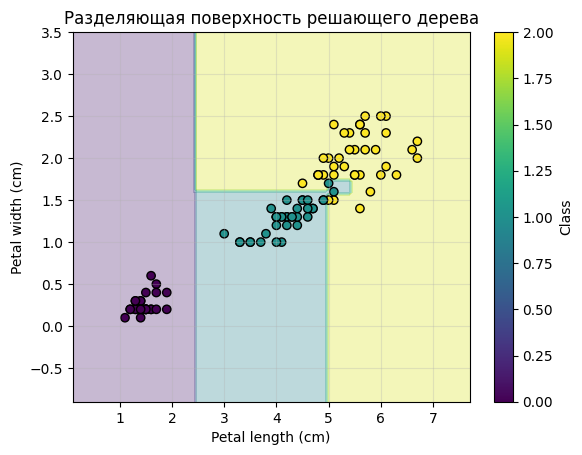

In [9]:
# Обучение дерева  на двух признаках
X_iris_two_features = X_iris[:, 2:]  # petal length и petal width
X_train_two, X_test_two, y_train_two, y_test_two = train_test_split(
    X_iris_two_features, y_iris, test_size=0.3, random_state=42
)

tree_two_features = DecisionTreeClassifier(random_state=42)
tree_two_features.fit(X_train_two, y_train_two)

# Визуализация разделяющей поверхности
plt.figure(figsize=(10, 8))
DecisionBoundaryDisplay.from_estimator(
    tree_two_features,
    X_train_two,
    cmap='viridis',
    alpha=0.3,
    response_method="predict"
)
scatter = plt.scatter(X_train_two[:, 0], X_train_two[:, 1], c=y_train_two, cmap='viridis', edgecolor='black')
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.title('Разделяющая поверхность решающего дерева')
plt.colorbar(scatter, label='Class')
plt.grid(True, alpha=0.3)
plt.show()

Связь сплитов и ступенчатой формы

Каждый внутренний узел дерева содержит условие: признак ≤ пороговое_значение.
Эти условия создают прямоугольные области в пространстве признаков.Последовательное применение условий образует ступенчатую разделяющую поверхность

Ступенчатая форма поверхности  следует из бинарной природы сплитов дерева, где каждое решение разделяет пространство признаков параллельно осям координат.

### **2.3. Сравнение критериев: энтропия, Gini, доля ошибок**


In [10]:
tree_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
tree_gini.fit(X_iris_train, y_iris_train)

# Функции для вычисления критериев неоднородности
def misclassification_error(p):
    return 1 - np.max(p)

def entropy(p):
    p = p[p > 0]  # избегаем log(0)
    return -np.sum(p * np.log2(p))

def gini_index(p):
    return 1 - np.sum(p**2)

# информацию о структуре дерева
n_nodes = tree_gini.tree_.node_count
children_left = tree_gini.tree_.children_left
children_right = tree_gini.tree_.children_right
node_samples = tree_gini.tree_.n_node_samples
node_values = tree_gini.tree_.value

print(f"Всего узлов в дереве: {n_nodes}")

# Корень дерева (узел 0)
root_samples = node_samples[0]
root_value = node_values[0][0]
root_total = np.sum(root_value)
root_class_dist = root_value / root_total

print(f"\n=== Корень дерева (узел 0) ===")
print(f"Количество объектов: {root_samples}")
print(f"Распределение по классам: {root_value}")
print(f"Нормированное распределение: {root_class_dist}")

# Находим первый внутренний узел (не лист)
internal_nodes = []
for i in range(n_nodes):
    if children_left[i] != -1:  # не лист (имеет потомков)
        internal_nodes.append(i)

if len(internal_nodes) > 1:  # берем второй внутренний узел (первый - корень)
    internal_node_idx = internal_nodes[1]

    internal_samples = node_samples[internal_node_idx]
    internal_value = node_values[internal_node_idx][0]
    internal_total = np.sum(internal_value)
    internal_class_dist = internal_value / internal_total

    print(f"\n=== Внутренний узел {internal_node_idx} ===")
    print(f"Количество объектов: {internal_samples}")
    print(f"Распределение по классам: {internal_value}")
    print(f"Нормированное распределение: {internal_class_dist}")

    # Вычисляем критерии для обоих узлов
    print("\n=== Сравнение критериев неоднородности ===")
    print("| Узел | Распределение | Доля ошибок | Энтропия | Gini |")
    print("|------|---------------|-------------|----------|------|")

    # Корень
    misclass_root = misclassification_error(root_class_dist)
    entropy_root = entropy(root_class_dist)
    gini_root = gini_index(root_class_dist)
    print(f"| Корень | {np.round(root_class_dist, 3)} | {misclass_root:.4f} | {entropy_root:.4f} | {gini_root:.4f} |")

    # Внутренний узел
    misclass_internal = misclassification_error(internal_class_dist)
    entropy_internal = entropy(internal_class_dist)
    gini_internal = gini_index(internal_class_dist)
    print(f"| Узел {internal_node_idx} | {np.round(internal_class_dist, 3)} | {misclass_internal:.4f} | {entropy_internal:.4f} | {gini_internal:.4f} |")

else:
    print("Не найдено подходящих внутренних узлов для анализа")

Всего узлов в дереве: 19

=== Корень дерева (узел 0) ===
Количество объектов: 105
Распределение по классам: [0.2952381  0.35238095 0.35238095]
Нормированное распределение: [0.2952381  0.35238095 0.35238095]

=== Внутренний узел 2 ===
Количество объектов: 74
Распределение по классам: [0.  0.5 0.5]
Нормированное распределение: [0.  0.5 0.5]

=== Сравнение критериев неоднородности ===
| Узел | Распределение | Доля ошибок | Энтропия | Gini |
|------|---------------|-------------|----------|------|
| Корень | [0.295 0.352 0.352] | 0.6476 | 1.5802 | 0.6645 |
| Узел 2 | [0.  0.5 0.5] | 0.5000 | 1.0000 | 0.5000 |


Критерии дают близкие значения при относительно равномерных распределениях классов, как видно в корневом узле.Хотя абсолютные значения разные, все три критерия согласованно показывают высокую неоднородность узла.

Критерии заметно различаются при неравномерных распределениях, особенно когда:
узел становится чище (один класс доминирует),в узле остается только 2 класса вместо 3

Доля ошибок менее чувствительна, потому что она учитывает только максимальную вероятность класса. Энтропия и Gini учитывают всё распределение, поэтому лучше различают "почти чистые" и "совсем чистые" узлы.




### **2.4. Глубина дерева и переобучение**

Глубина 1: train=0.6476, test=0.7111
Глубина 2: train=0.9429, test=0.9778
Глубина 3: train=0.9524, test=1.0000
Глубина 4: train=0.9714, test=1.0000
Глубина 5: train=0.9905, test=1.0000
Глубина 7: train=1.0000, test=1.0000
Глубина 10: train=1.0000, test=1.0000
Глубина None: train=1.0000, test=1.0000


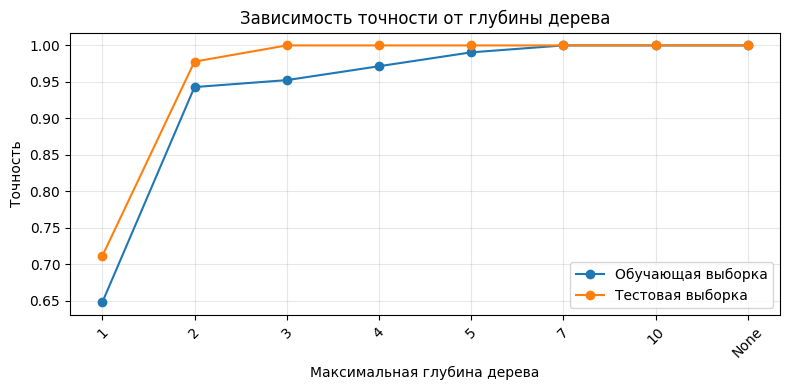

In [11]:
# Исследование влияния глубины дерева
depths = [1, 2, 3, 4, 5, 7, 10, None]
train_scores = []
test_scores = []

for depth in depths:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree.fit(X_iris_train, y_iris_train)

    train_score = tree.score(X_iris_train, y_iris_train)
    test_score = tree.score(X_iris_test, y_iris_test)

    train_scores.append(train_score)
    test_scores.append(test_score)

    print(f"Глубина {depth}: train={train_score:.4f}, test={test_score:.4f}")

# График зависимости точности от глубины
plt.figure(figsize=(8, 4))
plt.plot([str(d) for d in depths], train_scores, 'o-', label='Обучающая выборка')
plt.plot([str(d) for d in depths], test_scores, 'o-', label='Тестовая выборка')
plt.xlabel('Максимальная глубина дерева')
plt.ylabel('Точность')
plt.title('Зависимость точности от глубины дерева')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Явное недообучение:
- Глубина 1: train=0.64, test=0.71
- Глубина 2: train=0.94, test=0.97

Переобучение:
- Глубины 7-None: train=1.0, test=1.0 - формально есть переобучение (идеальная точность на train)

Bias-Variance Trade-off

High Bias (недообучение):
- Глубина 1-2: большая ошибка на обоих выборках
- Модель слишком простая

Low Bias, Controlled Variance (оптимально):
- Глубина 3-5: низкая ошибка на train, отличная на test
- Хороший баланс между сложностью и обобщающей способностью

Low Bias, High Variance (потенциальное переобучение):
- Глубина 7+: идеально на train, но рискует переобучиться на более сложных данных

Практическая необходимость ограничения глубины и pruning

Предотвращение переобучения - на реальных данных слишком глубокие деревья запоминают шум. Улучшение интерпретируемости - простые деревья легче понять. Повышение устойчивости - уменьшение чувствительности к выбросам.

Pruning полезно потому что:позволяет построить дерево полностью, затем удалить маловажные ветви, часто дает лучшее качество чем pre-pruning (ограничение глубины)




## **Задание 3. Решающее дерево для регрессии**

## **3.1. Базовое дерево регрессии**

In [12]:
# Дерево регрессии без ограничения глубины
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_diabetes_train, y_diabetes_train)

y_train_pred_tree = tree_reg.predict(X_diabetes_train)
y_test_pred_tree = tree_reg.predict(X_diabetes_test)

train_mse_tree = mean_squared_error(y_diabetes_train, y_train_pred_tree)
test_mse_tree = mean_squared_error(y_diabetes_test, y_test_pred_tree)
train_r2_tree = r2_score(y_diabetes_train, y_train_pred_tree)
test_r2_tree = r2_score(y_diabetes_test, y_test_pred_tree)

print("Дерево регрессии (без ограничения глубины):")
print(f"MSE на обучающей выборке: {train_mse_tree:.2f}")
print(f"MSE на тестовой выборке: {test_mse_tree:.2f}")
print(f"R² на обучающей выборке: {train_r2_tree:.4f}")
print(f"R² на тестовой выборке: {test_r2_tree:.4f}")

Дерево регрессии (без ограничения глубины):
MSE на обучающей выборке: 0.00
MSE на тестовой выборке: 5697.79
R² на обучающей выборке: 1.0000
R² на тестовой выборке: -0.0555



Наблюдается сильное переобучение: Разрыв между train и test MSE огромен (0.00 vs 5697.79).

Дерево регрессии строит кусочно-постоянную функцию потому что:
Каждый лист дерева содержит постоянное значение - среднее целевой переменной для объектов, попавших в этот лист.Пространство признаков разбивается на прямоугольные области, параллельные осям координат.Для нового объекта находится соответствующий лист, и предсказанием служит константа, хранящаяся в этом листе.Получается ступенчатая функция, где на каждой области признакового пространства модель выдает постоянное значение.

### **3.2. Глубина и MSE**

Глубина 1: train MSE=4312.99, test MSE=4280.76
Глубина 2: train MSE=3442.46, test MSE=3479.64
Глубина 3: train MSE=2918.47, test MSE=3616.77
Глубина 4: train MSE=2450.51, test MSE=3649.42
Глубина 5: train MSE=1965.72, test MSE=3818.07
Глубина 7: train MSE=1201.56, test MSE=4676.07
Глубина 10: train MSE=301.93, test MSE=5206.91
Глубина 15: train MSE=0.68, test MSE=5638.12
Глубина None: train MSE=0.00, test MSE=5697.79


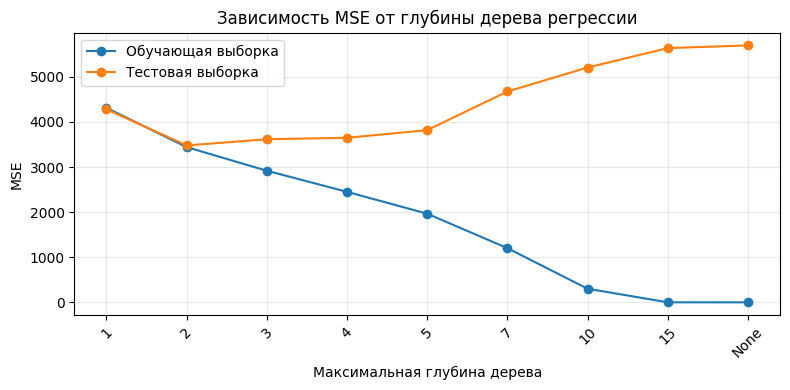

In [13]:
# Исследование влияния глубины на MSE
depths_reg = [1, 2, 3, 4, 5, 7, 10, 15, None]
train_mses = []
test_mses = []

for depth in depths_reg:
    tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    tree.fit(X_diabetes_train, y_diabetes_train)

    train_mse = mean_squared_error(y_diabetes_train, tree.predict(X_diabetes_train))
    test_mse = mean_squared_error(y_diabetes_test, tree.predict(X_diabetes_test))

    train_mses.append(train_mse)
    test_mses.append(test_mse)

    print(f"Глубина {depth}: train MSE={train_mse:.2f}, test MSE={test_mse:.2f}")

# График зависимости MSE от глубины
plt.figure(figsize=(8, 4))
plt.plot([str(d) for d in depths_reg], train_mses, 'o-', label='Обучающая выборка')
plt.plot([str(d) for d in depths_reg], test_mses, 'o-', label='Тестовая выборка')
plt.xlabel('Максимальная глубина дерева')
plt.ylabel('MSE')
plt.title('Зависимость MSE от глубины дерева регрессии')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


График имеет схожую форму с классификацией, но с важными отличиями:
В классификации accuracy достигает плато (1.0), а MSE продолжает ухудшаться на тесте. Точка переобучения более выражена, уже на глубине 3-4 тестовая MSE начинает расти.Разрыв между train и test значительно больше чем в классификации

Причины роста MSE на тесте при большой глубине.

MSE на обучении  почти 0, тк создает отдельные листья для каждого или почти каждого наблюдения, идеально запоминая тренировочные данные
MSE на тесте растет, тк Ммдель учит шум и специфические особенности тренировочной выборки, которые не повторяются в тестовых данных


Для данного регрессионного датасета следует ограничивать глубину дерева 2-3 уровнями для достижения наилучшей обобщающей способности.

## **Задание 4. Ансамбли: бэггинг и Random Forest**

### **4.1. Бэггинг деревьев (идея эксперимента)**


**Бутстрап-выборка** - это метод создания множественных псевдовыборок из исходных данных путем случайного выбора объектов с возвращением (with replacement).Каждая бутстрап-выборка имеет тот же размер, что и исходная выборка. Некоторые объекты могут повторяться несколько раз. Некоторые объекты могут отсутствовать в конкретной бутстрап-выборке

**Усреднение предсказаний нескольких моделей снижает дисперсию потому что:**
Отдельные модели могут делать ошибки в разных направлениях.При усреднении эти ошибки компенсируют друг друга.


**Деревья решений особенно выигрывают от бэггинга потому что они обладают:**
Высокой дисперсией, небольшие изменения в данных могут сильно менять структуру дерева. Низким смещением, способны хорошо приближать сложные зависимости.нестабильностью, чувствительны к шуму и выбросам в данных

Бэггинг превращает этот недостаток в преимущество, тк создает множество различных деревьев на разных бутстрап-выборках, усредняет их предсказания, сохраняя низкое смещение, но значительно снижая дисперсию,получается более устойчивая и точная модель
поэтому Random Forest обычно значительно превосходит одиночные деревья по качеству предсказаний.

###**4.2. Random Forest для классификации**

In [14]:
rf_classifier = RandomForestClassifier(
    n_estimators=15,
    max_depth=None,
    oob_score=True,
    random_state=42
)
rf_classifier.fit(X_iris_train, y_iris_train)

single_tree_accuracy = tree_gini.score(X_iris_test, y_iris_test)
rf_test_accuracy = rf_classifier.score(X_iris_test, y_iris_test)
rf_oob_accuracy = rf_classifier.oob_score_

print("Сравнение качества классификации:")
print(f"Одиночное дерево (тест): {single_tree_accuracy:.4f}")
print(f"Random Forest (тест): {rf_test_accuracy:.4f}")
print(f"Random Forest (OOB): {rf_oob_accuracy:.4f}")

Сравнение качества классификации:
Одиночное дерево (тест): 1.0000
Random Forest (тест): 1.0000
Random Forest (OOB): 0.9333



OOB-точность достаточно близка к тестовой, но есть  разница:
- Тестовая точность: 1.0000 (100%)
- OOB-точность: 0.9333 (93.33%)
- Разница составляет 6.67% -  умеренное расхождение

OOB-оценка удобна при построении леса потому что:
 использует объекты, не вошедшие в бутстрап-выборку для каждого дерева, вся выборка используется и для обучения, и для валидации.


### **4.3. Число деревьев и важности признаков**

/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


n_estimators=5: test=1.0000, OOB=0.8286
n_estimators=10: test=1.0000, OOB=0.9238
n_estimators=30: test=1.0000, OOB=0.9238
n_estimators=100: test=1.0000, OOB=0.9429
n_estimators=300: test=1.0000, OOB=0.9429


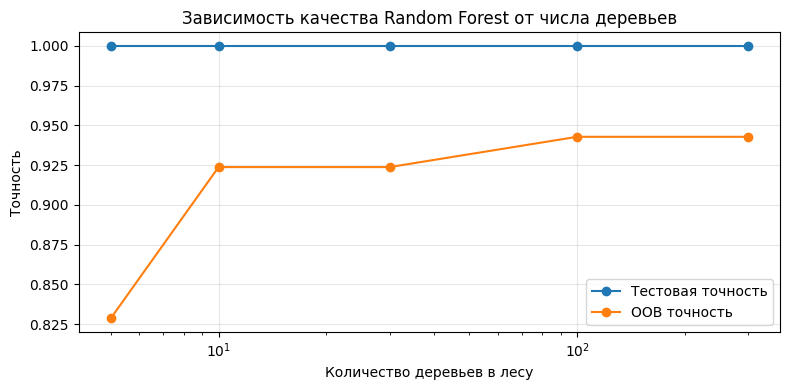


Важности признаков (Random Forest):
1. petal length (cm): 0.4269
2. petal width (cm): 0.4130
3. sepal length (cm): 0.1064
4. sepal width (cm): 0.0536


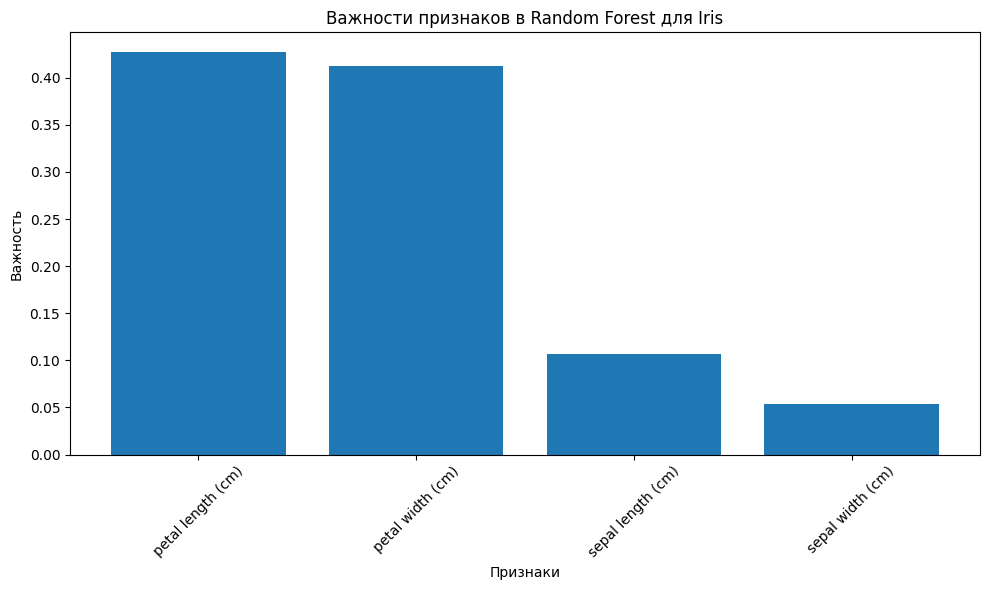

In [15]:
n_estimators_list = [5, 10, 30, 100, 300]
test_scores_rf = []
oob_scores_rf = []

for n_est in n_estimators_list:
    rf = RandomForestClassifier(
        n_estimators=n_est,
        random_state=42,
        oob_score=True
    )
    rf.fit(X_iris_train, y_iris_train)

    test_score = rf.score(X_iris_test, y_iris_test)
    oob_score = rf.oob_score_

    test_scores_rf.append(test_score)
    oob_scores_rf.append(oob_score)

    print(f"n_estimators={n_est}: test={test_score:.4f}, OOB={oob_score:.4f}")

# График зависимости качества от числа деревьев
plt.figure(figsize=(8, 4))
plt.plot(n_estimators_list, test_scores_rf, 'o-', label='Тестовая точность')
plt.plot(n_estimators_list, oob_scores_rf, 'o-', label='OOB точность')
plt.xlabel('Количество деревьев в лесу')
plt.ylabel('Точность')
plt.title('Зависимость качества Random Forest от числа деревьев')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xscale('log')
plt.tight_layout()
plt.show()

# Анализ важностей признаков
feature_importances = rf_classifier.feature_importances_
feature_names = iris.feature_names

# Сортировка признаков по важности
indices = np.argsort(feature_importances)[::-1]

print("\nВажности признаков (Random Forest):")
for i, idx in enumerate(indices):
    print(f"{i+1}. {feature_names[idx]}: {feature_importances[idx]:.4f}")

# Визуализация важностей признаков
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[indices])
plt.xticks(range(len(feature_importances)), [feature_names[i] for i in indices], rotation=45)
plt.xlabel('Признаки')
plt.ylabel('Важность')
plt.title('Важности признаков в Random Forest для Iris')
plt.tight_layout()
plt.show()

Качество стабилизируется при n_estimators при 30:
При 30-300 деревьях: OOB=0.9238-0.9429 (стабильное высокое качество). Тестовая точность всегда 1.0000 (идеальная)

Увеличение числа деревьев после 30 почти не меняет качество потому что: 30 деревьев уже покрывают основные паттерны в данных, маленький датасет (150 samples) быстро "исчерпывается"

Важности признаков для классификации ирисов

Ранжирование признаков по важности:
1. Petal length (0.4269) - наиболее значимый признак
2. Petal width (0.4130) - почти равная важность с длиной лепестка
3. Sepal length (0.1064) - значительно менее важен
4. Sepal width (0.0536) - наименее информативный признак

Согласование с визуальным анализом из Задания 1:
 На графике "Petal length vs Petal width классы были идеально разделены. Признаки лепестка оказались критически важными. Sepal признаки показали сильное перекрытие классов на визуализациях



### **4.4. Random Forest для регрессии (мини-эксперимент)**

In [16]:
rf_regressor = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)
rf_regressor.fit(X_diabetes_train, y_diabetes_train)

# Сравнение с одиночным деревом
single_tree_mse = test_mse_tree
rf_test_mse = mean_squared_error(y_diabetes_test, rf_regressor.predict(X_diabetes_test))

single_tree_r2 = test_r2_tree
rf_test_r2 = r2_score(y_diabetes_test, rf_regressor.predict(X_diabetes_test))

print("Сравнение качества регрессии:")
print(f"Одиночное дерево - MSE: {single_tree_mse:.2f}, R^2: {single_tree_r2:.4f}")
print(f"Random Forest - MSE: {rf_test_mse:.2f}, R^2: {rf_test_r2:.4f}")
print(f"Улучшение MSE: {((single_tree_mse - rf_test_mse) / single_tree_mse * 100):.1f}%")
print(f"Улучшение R^2: {((rf_test_r2 - single_tree_r2) / abs(single_tree_r2) * 100):.1f}%")

Сравнение качества регрессии:
Одиночное дерево - MSE: 5697.79, R^2: -0.0555
Random Forest - MSE: 2859.64, R^2: 0.4703
Улучшение MSE: 49.8%
Улучшение R^2: 947.7%


Одиночное дерево регрессии:
- MSE: 5697.79
- R^2: -0.0555

Random Forest:
- MSE: 2859.64
- R^2: 0.4703

Random Forest  улучшает качество по сравнению с одиночным деревом:
   - Одиночное дерево показывало отрицательный R^2 (-0.0555), что означает, что оно работало хуже простого среднего значения
   - Random Forest демонстрирует хороший положительный R^2 (0.4703), объясняя 47% дисперсии целевой переменной
   - Уменьшение MSE на 49.8% - ошибка предсказания сократилась вдвое
   - Улучшение R^2 на 947.7% - переход от бесполезной модели к работающей

Для регрессионной задачи на датасете Diabetes ансамблирование в виде Random Forest дает кардинальное улучшение качества, превращая практически бесполезную модель (R^2 < 0) в эффективную предсказательную систему, объясняющую почти половину дисперсии целевой переменной.

## Задание 5. Дополнительные вопросы

### 1. Pre-pruning vs Post-pruning
**Pre-pruning** - ограничение роста дерева на этапе построения (max_depth, min_samples_split). **Post-pruning** - построение полного дерева с последующим удалением ветвей. В библиотеках обычно используется pre-pruning из-за эффективности. В Random Forest pruning не нужен, так как усреднение компенсирует переобучение отдельных деревьев.

### 2. Особенности деревьев
- Не требуют нормировки: сплиты основаны на сравнении значений, а не абсолютных величинах
- Работа с категориальными признаками: бинарные сплиты  или one-hot encoding

### 3. Сравнение одиночных деревьев и Random Forest
- Качество: RF значительно лучше (MSE: 5698 → 2860, R^2: -0.06 → 0.47)
- Устойчивость к шуму: RF устойчивее за счет усреднения
- Интерпретируемость: деревья проще интерпретировать, но RF дает важности признаков

### 4. Сравнение с SVM
- Деревья: оси-параллельные границы, хорошо для категориальных данных
- SVM: сложные нелинейные границы. Выбор зависит от типа данных и требований к интерпретируемости

Поведение решающих деревьев

Глубина дерева критически влияет на переобучение:
- Малые глубины (1-2) → недообучение
- Оптимальные глубины (3-5) → баланс
- Большие глубины (7+) → переобучение

Критерии разбиения (Gini vs энтропия) дают схожие результаты, но:
- Энтропия более чувствительна к чистым узлам
- Gini вычислительно эффективнее
- На практике разница незначительна

Польза ансамблирования и Random Forest

Ключевые преимущества Random Forest:
- Снижение дисперсии на 50%
- Устранение переобучения отдельных деревьев


OOB-оценка - мощный инструмент для валидации без разделения данных.

Лучше начинать с Random Forest - он надежнее одиночного дерева и требует меньше настроек,ограничивать глубину 5-10 уровнями для большинства задач,30-100 деревьев может быть достаточно для стабильного качества

